
# [SemEval 2023 - Task 10 - Explainable Detection of Online Sexism (EDOS)](https://codalab.lisn.upsaclay.fr/competitions/7124)

In this notebook, we will study the dataset for the EDOS task. The goal of this shared task is to develop automatic systems that allows to identify sexist content and provide more explanations about it. 

The task contains three hierarchical subtasks:

- TASK A - Binary Sexism Detection: a two-class (or binary) classification where systems have to predict whether a post is sexist or not sexist.
- TASK B - Category of Sexism: for posts which are sexist, a four-class classification where systems have to predict one of four categories: (1) threats, (2)  derogation, (3) animosity, (4) prejudiced discussion. 
- TASK C - Fine-grained Vector of Sexism: for posts which are sexist, an 11-class classification where systems have to predict one of 11 fine-grained vectors.




The whole dataset consists of 20,000 entries: 10,000 are from Gab and 10,000 from Reddit. Gab is a social networking service known for its far-right userbase. 

The dataset  was randomly split with a division ratio of 70:10:20% (training: develoment:test)


First, we will explore the training dataset. There is a one CSV file for training data for the three tasks: 

- rewire_id: a unique identifier for each entry
- text: the input text
- label_sexist: Task A label
- label_category: Task B label.
- label_vector: Task C label.

NOTE: For not sexist entries, label_category and label_vector are set to the string "none".



## Loading the dataset

In the following cells, we are going to explore the dataset. 

First, we have to mount our google drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
path = "/content/drive/My Drive/Colab Notebooks/data/edos/"
# we load the training dataset. There is one only file for the three tasks
df = pd.read_csv(path+"edos_labelled.csv") 
df.head()

,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev
1,sexism2022_english-16993,"Then, she's a keeper. 😉",not sexist,none,none,train
2,sexism2022_english-13149,This is like the Metallica video where the poo...,not sexist,none,none,train
3,sexism2022_english-13021,woman?,not sexist,none,none,train
4,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev


The previous dataframe contains all the files of the dataset for the shared task. The field task allows us to know the split of each record. 
The full dataset contains three splits (train, dev and test) with a ration of 70:10:20. 

In [3]:
df['split'].unique()

array(['dev', 'train', 'test'], dtype=object)

We save each split into a dataframe. 

In [4]:
df_train = df[df['split']=='train'] # for training
df_dev = df[df['split']=='dev'] # for validation
df_test = df[df['split']=='test'] # for final test

print('training size: ', df_train.shape)
print('validation size: ', df_dev.shape)
print('test size: ', df_test.shape)

training size:  (14000, 6)
validation size:  (2000, 6)
test size:  (4000, 6)


## Class Distribution

We are going to see the class distribution in each subtask.

### Class distribution for task 1


In [5]:
data_train1 = df_train["label_sexist"].value_counts().reset_index()
data_train1.columns = ['label_sexist', 'counts']

data_dev1 = df_dev["label_sexist"].value_counts().reset_index()
data_dev1.columns = ['label_sexist', 'counts']

data_test1 = df_test["label_sexist"].value_counts().reset_index()
data_test1.columns = ['label_sexist', 'counts']



print("Class distribution in training split:", data_train1.to_dict())
print("Class distribution in validation split:", data_dev1.to_dict())
print("Class distribution in test split:", data_test1.to_dict())

#counts_train.head()
#counts_dev.head()
#counts_test.head()

Class distribution in training split: {'label_sexist': {0: 'not sexist', 1: 'sexist'}, 'counts': {0: 10602, 1: 3398}}
Class distribution in validation split: {'label_sexist': {0: 'not sexist', 1: 'sexist'}, 'counts': {0: 1514, 1: 486}}
Class distribution in test split: {'label_sexist': {0: 'not sexist', 1: 'sexist'}, 'counts': {0: 3030, 1: 970}}


We can see that the 'not sexist' is the majoritary class in the three splits. Although the previous dictionaries provide useful information, we will also create plots that help us to understand better the distribution of the data. 

Text(0.5, 1.0, 'Test split')

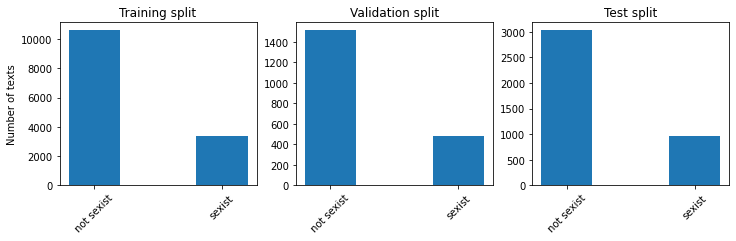

In [6]:
import matplotlib.pyplot as plt

fig, (ax_train, ax_dev, ax_test) = plt.subplots(1, 3, figsize=(12, 3))
# fig.suptitle('Distribution of the languages in both subsets: training and test')
ax_train.bar(data_train1['label_sexist'], data_train1['counts'], width=0.4)
ax_train.set_xticklabels(data_train1['label_sexist'], rotation=45)
ax_train.set_title('Training split')
ax_train.set_ylabel('Number of texts')

ax_dev.bar(data_dev1['label_sexist'], data_dev1['counts'], width=0.4)
ax_dev.set_xticklabels(data_dev1['label_sexist'], rotation=45)
ax_dev.set_title('Validation split')

ax_test.bar(data_test1['label_sexist'], data_test1['counts'], width=0.4)
ax_test.set_xticklabels(data_test1['label_sexist'], rotation=45)
ax_test.set_title('Test split')


The plots clearly show that the minoritary class is the 'sexist' class in the three splits. 

### Class Distribution for the task 2

Now, we will study the class distribution for the field 'label_category' (task 2). 
We need to remove the records that are classified as 'not sexist'. 

In [7]:
df_train_sex = df_train[df_train['label_sexist']=='sexist']
df_dev_sex = df_dev[df_dev['label_sexist']=='sexist']
df_test_sex = df_test[df_test['label_sexist']=='sexist']

print('Size of the training split for the tasks 2 and 3', df_train_sex.shape)
print('Size of the validation split for the tasks 2 and 3', df_dev_sex.shape)
print('Size of the test split for the tasks 2 and 3', df_test_sex.shape)


Size of the training split for the tasks 2 and 3 (3398, 6)
Size of the validation split for the tasks 2 and 3 (486, 6)
Size of the test split for the tasks 2 and 3 (970, 6)


In [8]:
data_train2 = df_train_sex["label_category"].value_counts().reset_index()
data_train2.columns = ['label_category', 'counts']

data_dev2 = df_dev_sex["label_category"].value_counts().reset_index()
data_dev2.columns = ['label_category', 'counts']

data_test2 = df_test_sex["label_category"].value_counts().reset_index()
data_test2.columns = ['label_category', 'counts']

# print("Class distribution in training split for the task 2:", data_train2)
# print("Class distribution in validation split for the task 2:", data_dev2)
# print("Class distribution in test split for the task 2: ", data_test2)


In [9]:
data_test2['label_category'].tolist()

['2. derogation',
 '3. animosity',
 '4. prejudiced discussions',
 '1. threats, plans to harm and incitement']

We define a dictionary that assigns a color to each category: 

In [10]:
colors = ['orchid', 'lightsalmon', 'yellowgreen','deepskyblue']
labels = sorted(data_train2['label_category'].tolist())
# print(labels)

dict_color = dict(zip(labels, colors))
dict_color

color_train = data_train2['label_category'].apply(lambda x: dict_color[x]).tolist()
color_dev = data_dev2['label_category'].apply(lambda x: dict_color[x]).tolist()
color_test = data_test2['label_category'].apply(lambda x: dict_color[x]).tolist()
# print(color_train)
# print(color_dev)
# print(color_test)

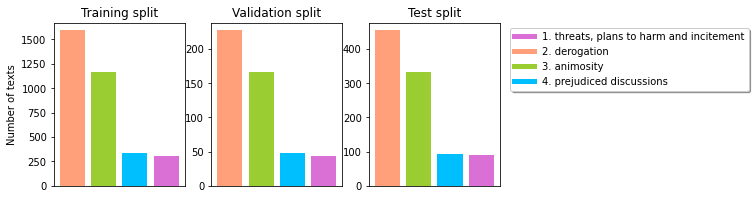

In [11]:
from matplotlib.lines import Line2D

fig, (ax_train, ax_dev, ax_test) = plt.subplots(1, 3, figsize=(8, 3))
ax_train.bar(data_train2['label_category'], data_train2['counts'], label=dict_color.keys(), color=color_train)
# ax_train.set_xticklabels(data_train['label_category'], rotation=45)
ax_train.set_title('Training split')
ax_train.set_ylabel('Number of texts')
ax_train.axes.get_xaxis().set_ticks([]) #hide the labels 



ax_dev.bar(data_dev2['label_category'], data_dev2['counts'], label=dict_color.keys(), color=color_dev)
#ax_dev.set_xticklabels(counts_dev['label_category'], rotation=45)
ax_dev.axes.get_xaxis().set_ticks([])  #hide the labels 

ax_dev.set_title('Validation split')

ax_test.bar(data_test2['label_category'], data_test2['counts'], label=dict_color.keys(), color=color_test)
#ax_test.set_xticklabels(counts_test['label_category'], rotation=45)
ax_test.axes.get_xaxis().set_ticks([])  #hide the labels 

ax_test.set_title('Test split')


# plt.legend()

lines = [Line2D([0], [0], color=c, linewidth=5) for c in colors]
plt.legend(lines, dict_color.keys(), ncol=1, bbox_to_anchor=(1.04, 1), loc="upper left", fancybox=True, shadow=True)
plt.show()




### Class distribution for the task 3

Show the distribution of the 11 subcategories ("label_vector"). 

In [12]:
data_train3 = df_train_sex["label_vector"].value_counts().reset_index()
data_train3.columns = ['label_vector', 'counts']

data_dev3 = df_dev_sex["label_vector"].value_counts().reset_index()
data_dev3.columns = ['label_vector', 'counts']

data_test3 = df_test_sex["label_vector"].value_counts().reset_index()
data_test3.columns = ['label_vector', 'counts']

In [13]:
labels3= sorted(data_train3['label_vector'])
labels3


['1.1 threats of harm',
 '1.2 incitement and encouragement of harm',
 '2.1 descriptive attacks',
 '2.2 aggressive and emotive attacks',
 '2.3 dehumanising attacks & overt sexual objectification',
 '3.1 casual use of gendered slurs, profanities, and insults',
 '3.2 immutable gender differences and gender stereotypes',
 '3.3 backhanded gendered compliments',
 '3.4 condescending explanations or unwelcome advice',
 '4.1 supporting mistreatment of individual women',
 '4.2 supporting systemic discrimination against women as a group']

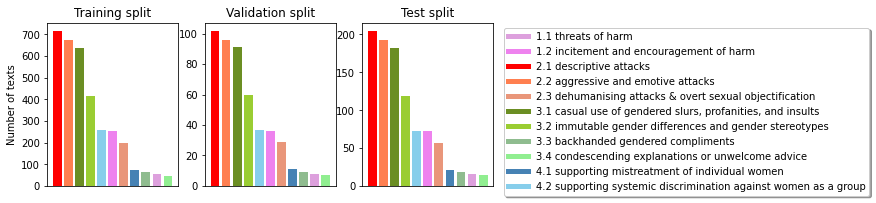

In [14]:
# dos primeras un orchid , son de la clase 1
# tres siguientes deben ser de color rojizo
# las 4 siguientes son la clase 3, debe tener un color verde
# los dos últimos azules
colors3 = ['plum', 'violet', 
           'red', 'coral', 'darksalmon', 
           'olivedrab', 'yellowgreen', 'darkseagreen', 'lightgreen',  
           'steelblue', 'skyblue' ]

labels3 = sorted(data_train3['label_vector'].tolist())
# print(labels3)

dict_color3 = dict(zip(labels3, colors3))


color_train3 = data_train3['label_vector'].apply(lambda x: dict_color3[x]).tolist()
color_dev3 = data_dev3['label_vector'].apply(lambda x: dict_color3[x]).tolist()
color_test3 = data_test3['label_vector'].apply(lambda x: dict_color3[x]).tolist()
# print(color_train)
# print(color_dev)
# print(color_test)



fig, (ax_train, ax_dev, ax_test) = plt.subplots(1, 3, figsize=(8, 3))
ax_train.bar(data_train3['label_vector'], data_train3['counts'], label=dict_color3.keys(), color=color_train3)
ax_train.set_title('Training split')
ax_train.set_ylabel('Number of texts')
ax_train.axes.get_xaxis().set_ticks([]) #hide the labels 



ax_dev.bar(data_dev3['label_vector'], data_dev3['counts'], label=dict_color3.keys(), color=color_dev3)
ax_dev.axes.get_xaxis().set_ticks([])  #hide the labels 
ax_dev.set_title('Validation split')

ax_test.bar(data_test3['label_vector'], data_test3['counts'], label=dict_color3.keys(), color=color_test3)
ax_test.axes.get_xaxis().set_ticks([])  #hide the labels 

ax_test.set_title('Test split')



lines = [Line2D([0], [0], color=c, linewidth=5) for c in colors3]
plt.legend(lines, dict_color3.keys(), ncol=1, bbox_to_anchor=(1.04, 1), loc="upper left", fancybox=True, shadow=True)
plt.show()



In [15]:
data_train3

,label_vector,counts
0,2.1 descriptive attacks,717
1,2.2 aggressive and emotive attacks,673
2,"3.1 casual use of gendered slurs, profanities,...",637
3,3.2 immutable gender differences and gender st...,417
4,4.2 supporting systemic discrimination against...,258
5,1.2 incitement and encouragement of harm,254
6,2.3 dehumanising attacks & overt sexual object...,200
7,4.1 supporting mistreatment of individual women,75
8,3.3 backhanded gendered compliments,64
9,1.1 threats of harm,56


In [16]:
data_dev3

,label_vector,counts
0,2.1 descriptive attacks,102
1,2.2 aggressive and emotive attacks,96
2,"3.1 casual use of gendered slurs, profanities,...",91
3,3.2 immutable gender differences and gender st...,60
4,4.2 supporting systemic discrimination against...,37
5,1.2 incitement and encouragement of harm,36
6,2.3 dehumanising attacks & overt sexual object...,29
7,4.1 supporting mistreatment of individual women,11
8,3.3 backhanded gendered compliments,9
9,1.1 threats of harm,8


In [17]:
data_test3

,label_vector,counts
0,2.1 descriptive attacks,205
1,2.2 aggressive and emotive attacks,192
2,"3.1 casual use of gendered slurs, profanities,...",182
3,3.2 immutable gender differences and gender st...,119
4,4.2 supporting systemic discrimination against...,73
5,1.2 incitement and encouragement of harm,73
6,2.3 dehumanising attacks & overt sexual object...,57
7,4.1 supporting mistreatment of individual women,21
8,3.3 backhanded gendered compliments,18
9,1.1 threats of harm,16


We can see that the subcategory 2.1 has the maximum amount of instances, while 3.4 is the subcategory with the lowest number of instances.

## Distribution of the length texts 

Knowing the class distribution is an important issue that help us to discuss about the results. 
Moreover, we would like to know how the texts are and if there are significant differences between the categories texts. For example, we can study if sexist posts are shorter or longer than the non-sexist posts, or on the contrary, they have similar lenghts. 

We add a new field to the dataframe to contain the lenght of each text:

In [30]:
df["length"]=df['text'].apply(lambda x: len(x.split()))

df_train["length"]=df_train['text'].apply(lambda x: len(x.split()))
df_dev["length"]=df_dev['text'].apply(lambda x: len(x.split()))
df_test["length"]=df_test['text'].apply(lambda x: len(x.split()))


<ipython-input-30-b7e12eea397e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["length"]=df_train['text'].apply(lambda x: len(x.split()))
<ipython-input-30-b7e12eea397e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev["length"]=df_dev['text'].apply(lambda x: len(x.split()))
<ipython-input-30-b7e12eea397e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [43]:
df_train['length'].describe(percentiles=[0, 0.25, 0.50, 0.75, 0.95])

count    14000.000000
mean        23.420214
std         11.658727
min          1.000000
0%           1.000000
25%         14.000000
50%         22.000000
75%         33.000000
95%         43.000000
max         55.000000
Name: length, dtype: float64

In [44]:
df_dev['length'].describe(percentiles=[0, 0.25, 0.50, 0.75, 0.95])

count    2000.000000
mean       23.033500
std        11.794063
min         1.000000
0%          1.000000
25%        13.000000
50%        21.500000
75%        32.000000
95%        44.000000
max        56.000000
Name: length, dtype: float64

In [42]:
#
#
df_test['length'].describe(percentiles=[0, 0.25, 0.50, 0.75, 0.95])

count    4000.000000
mean       23.060500
std        11.842124
min         1.000000
0%          1.000000
25%        13.000000
50%        22.000000
75%        32.000000
95%        44.000000
max        58.000000
Name: length, dtype: float64

### Length Distribution for each split

Text(0.5, 0, 'Number of texts')

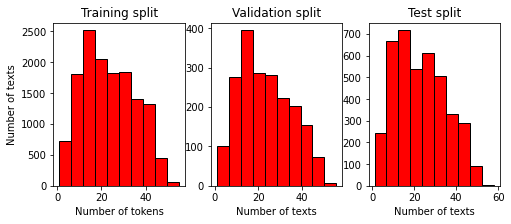

In [47]:

fig, (ax_train, ax_dev, ax_test) = plt.subplots(1, 3, figsize=(8, 3))
# fig.suptitle('Distribución del tamaño de los textos')

ax_train.hist(df_train['length'],  color = 'red', edgecolor = 'black',
         )
ax_train.set_title('Training split')
ax_train.set_xlabel('Number of tokens')
ax_train.set_ylabel('Number of texts')


ax_dev.hist(df_dev['length'],  color = 'red', edgecolor = 'black',
         )
ax_dev.set_title('Validation split')
ax_dev.set_xlabel('Number of texts')

ax_test.hist(df_test['length'],  color = 'red', edgecolor = 'black',
         )
ax_test.set_title('Test split')
ax_test.set_xlabel('Number of texts')
#ax_test.set_ylabel('Number of tweets')

In [22]:
df_train["length"].describe()

count    14000.000000
mean        23.420214
std         11.658727
min          1.000000
25%         14.000000
50%         22.000000
75%         33.000000
max         55.000000
Name: length, dtype: float64

In [23]:
df_dev["length"].describe()

count    2000.000000
mean       23.033500
std        11.794063
min         1.000000
25%        13.000000
50%        21.500000
75%        32.000000
max        56.000000
Name: length, dtype: float64

In [24]:
df_test["length"].describe()

count    4000.000000
mean       23.060500
std        11.842124
min         1.000000
25%        13.000000
50%        22.000000
75%        32.000000
max        58.000000
Name: length, dtype: float64

We can also use the seaborn library

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


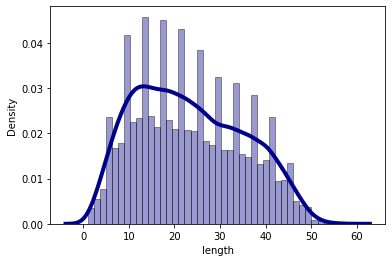

In [52]:
import seaborn as sns

# Density Plot and Histogram of all lenghts of the tweets
sns.distplot(df['length'], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### Length distribution of sexist and non-sexist texts

Now, we are going to create a histogram with the length distribution of texts for each type: sexist or non sexist.

As the three splits appear to have a similar length distributuion, we create the density plot for the whole dataset:



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

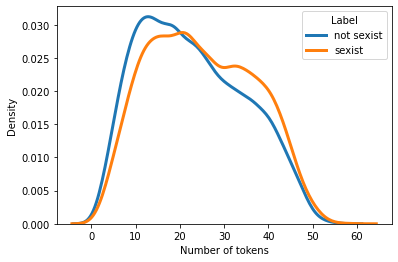

In [48]:
labels = df["label_sexist"].unique()
for name in labels:
    # Subset to the language
    subset = df[df['label_sexist'] == name]
    
    # Draw the density plot
    sns.distplot(subset['length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name)

  
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Label')
# plt.title('Density Plot for sexist and non-sexist posts')
plt.xlabel('Number of tokens')
plt.ylabel('Density')

We can see that the length distribution of the texts is very similar for both classes: sexist and non-sexist. 

### Lenth distribution for each category
Now we show the length distribution for the four categories of sexist posts.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

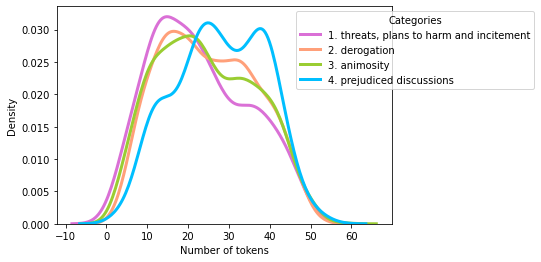

In [63]:
df2 = df[df["label_category"]!='none']

labels = sorted(df2["label_category"].unique())
for name in labels:
    # Subset to the language
    subset = df2[df2['label_category'] == name]
    
    # Draw the density plot
    sns.distplot(subset['length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name, color = dict_color[name])
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Categories', bbox_to_anchor=(0.7, 0.8), loc="center left" )
# plt.title('Density Plot for sexist texts per category (categories)')
plt.xlabel('Number of tokens')
plt.ylabel('Density')

We can observe that the posts classified as threats often are shorter than those classified as 4. However, posts classied with the categories 2 and 3 have very similar length distribution. 

So, we may think that the posts classified in prejudiced discusions are usually longer than the other sexist posts. Moreover, we may think that threats are usually shorter than the other sexist. 
 

In [65]:
df_threat = df2['length'].where(df2['label_category'] == '1. threats, plans to harm and incitement')
df_threat.describe()

count    443.000000
mean      22.909707
std       11.768736
min        2.000000
25%       13.000000
50%       21.000000
75%       32.000000
max       52.000000
Name: length, dtype: float64

In [66]:
df_discus = df2['length'].where(df2['label_category'] == '4. prejudiced discussions')
df_discus.describe()



count    475.000000
mean      27.808421
std       10.907316
min        3.000000
25%       20.000000
50%       28.000000
75%       37.000000
max       54.000000
Name: length, dtype: float64

In [69]:
df2["label_category"].unique()

array(['3. animosity', '2. derogation', '4. prejudiced discussions',
       '1. threats, plans to harm and incitement'], dtype=object)

In [70]:
df_derogation = df2['length'].where(df2['label_category'] == '2. derogation')
df_derogation.describe()

count    2271.000000
mean       24.944958
std        11.475316
min         2.000000
25%        15.000000
50%        24.000000
75%        34.000000
max        53.000000
Name: length, dtype: float64

In [71]:
df_animosity = df2['length'].where(df2['label_category'] == '3. animosity')
df_animosity.describe()

count    1665.000000
mean       24.590390
std        11.893928
min         2.000000
25%        15.000000
50%        23.000000
75%        34.000000
max        58.000000
Name: length, dtype: float64

### Lenth distribution for each label vector

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

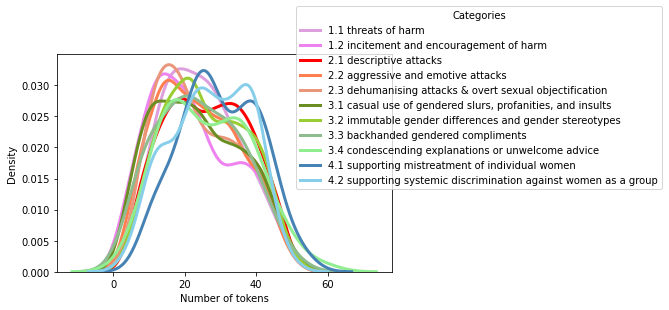

In [64]:
labels = sorted(df2["label_vector"].unique())
for name in labels:
    # Subset to the language
    subset = df2[df2['label_vector'] == name]
    
    # Draw the density plot
    sns.distplot(subset['length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name, color = dict_color3[name])
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Categories', bbox_to_anchor=(0.7, 0.8), loc="center left" )
# plt.title('Density Plot for sexist texts per category (categories)')
plt.xlabel('Number of tokens')
plt.ylabel('Density')

Show the lenght distrubition for the 11-fine graned subcategories:

There are too many subcategories, so it is dificult show the distribution. In this case, it would be better to use the method describe() of the dataframes. 